In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
LIMIT=7500
dataset = pd.ExcelFile('C06 und C07 Hackathon Groß.xlsx')
sheets = []
for sheet in dataset.sheet_names:
    sheets.append(dataset.parse(sheet))
dataset = pd.concat(sheets)
dataset = dataset[dataset['Aktualisiert am'].notnull()]
dataset = dataset[dataset['Erstellt am'].notnull()]
dataset = dataset[dataset['Ersteller Amt'].notnull()]
dataset['Dauer'] = dataset['Aktualisiert am'] - dataset['Erstellt am']
dataset['Dauer in Minuten'] = dataset['Dauer'].dt.total_seconds().div(60).astype(int)
bins_labels = [
    -1, 
    0, 
    5, 
    10, 
    30, 
    60, 
    60*2, 
    60*4, 
    60*8, 
    60*24, 
    60*24*2
]
dataset['Dauer Kategorie'] = pd.cut(dataset["Dauer in Minuten"], labels=range(len(bins_labels)-1), bins=bins_labels)
dataset = dataset[dataset['Dauer Kategorie'].notnull()]
#dataset['Erstellt_year'] = dataset['Erstellt am'].dt.year
dataset['Erstellt_month'] = dataset['Erstellt am'].dt.month
dataset['Erstellt_week'] = dataset['Erstellt am'].dt.week
dataset['Erstellt_day'] = dataset['Erstellt am'].dt.day
#dataset['Erstellt_hour'] = dataset['Erstellt am'].dt.hour
#dataset['Erstellt_minute'] = dataset['Erstellt am'].dt.minute
dataset['Erstellt_timeofday'] = dataset['Erstellt am'].dt.hour * 60 + dataset['Erstellt am'].dt.minute.floordiv(30)
dataset['Erstellt_dayofweek'] = dataset['Erstellt am'].dt.dayofweek
if LIMIT:
    dataset = dataset[:LIMIT]

"""
dataset['Tickets'] = 1

open_tickets = 0
date_series = pd.date_range(dataset['Erstellt am'].min(), dataset['Aktualisiert am'].max(), freq='1min')
old_d = dataset['Erstellt am'].min()
for d in date_series:
    temp = dataset[old_d < dataset['Erstellt am'] < d < dataset['Aktualisiert am'] < d + pd.Timedelta('1m')]
    temp['Tickets'].add(len(temp))
    old_d = d

for row in dataset.itertuples():
    current_date = row['Erstellt am']
    open_tickets += 1
    # print(row['Erstellt am'], row['Aktualisiert am'])



dataset['Erstellt am'] = pd.to_datetime(dataset['Erstellt am'])
dataset['Aktualisiert am'] = pd.to_datetime(dataset['Aktualisiert am'])
tickets_created = dataset.groupby([pd.Grouper(key='Erstellt am',freq='H'),dataset['Tickets']]).size().reset_index(name='count')
tickets_closed = dataset.groupby([pd.Grouper(key='Aktualisiert am',freq='H'),dataset['Tickets']]).size().reset_index(name='count')
# print(tickets_created)
# print(tickets_closed)
print(dataset)"""

"\ndataset['Tickets'] = 1\n\nopen_tickets = 0\ndate_series = pd.date_range(dataset['Erstellt am'].min(), dataset['Aktualisiert am'].max(), freq='1min')\nold_d = dataset['Erstellt am'].min()\nfor d in date_series:\n    temp = dataset[old_d < dataset['Erstellt am'] < d < dataset['Aktualisiert am'] < d + pd.Timedelta('1m')]\n    temp['Tickets'].add(len(temp))\n    old_d = d\n\nfor row in dataset.itertuples():\n    current_date = row['Erstellt am']\n    open_tickets += 1\n    # print(row['Erstellt am'], row['Aktualisiert am'])\n\n\n\ndataset['Erstellt am'] = pd.to_datetime(dataset['Erstellt am'])\ndataset['Aktualisiert am'] = pd.to_datetime(dataset['Aktualisiert am'])\ntickets_created = dataset.groupby([pd.Grouper(key='Erstellt am',freq='H'),dataset['Tickets']]).size().reset_index(name='count')\ntickets_closed = dataset.groupby([pd.Grouper(key='Aktualisiert am',freq='H'),dataset['Tickets']]).size().reset_index(name='count')\n# print(tickets_created)\n# print(tickets_closed)\nprint(dataset)

In [2]:
# print(pd.DataFrame(d).groupby("Datum").agg(["count", "sum"]))
        
#print(date_series)
dataset.drop(
    [
        'Ersteller Amt', 
        'Dauer', 
        'Dauer in Minuten', 
        'Erstellt am', 
        'Aktualisiert am', 
        'Latest Assignment Erstellt am'
    ], 
    axis=1, inplace=True
)

In [3]:
threshold = 10 # Anything that occurs less than this will be removed.
#for col in dataset.columns:
#    value_counts = dataset[col].value_counts() # Specific column 
#    to_remove = value_counts[value_counts <= threshold].index
#    dataset[col].replace(to_remove, np.nan, inplace=True)
    
value_counts = dataset['Ersteller Amt kurz'].value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= threshold].index
dataset['Ersteller Amt kurz'].replace(to_remove, 'Sonstige', inplace=True)

threshold = 100
value_counts = dataset['Erstellt_timeofday'].value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= threshold].index
dataset['Erstellt_timeofday'].replace(to_remove, '-1', inplace=True)


enc = OneHotEncoder(handle_unknown='ignore')
dum_df = pd.get_dummies(dataset["Ersteller Amt kurz"], prefix="Ersteller Amt kurz")
dataset = pd.concat([dataset, dum_df], axis=1)
dataset

for col in dataset.columns:
    value_counts = dataset[col].value_counts() # Specific column 
    print(col)
    print(value_counts)

Ersteller Amt kurz
Amt 54                         936
Amt 10                         838
Amt 53                         554
Amt 56                         464
Amt 60                         451
Amt 66                         373
Amt 55                         343
Büro des Oberbürgermeisters    341
Amt 01                         279
Amt 64                         270
Amt 52                         230
Amt 90                         219
Amt 30                         214
Amt 50                         200
Amt 61                         141
10                              92
Dezernat V                      90
Amt 67                          81
66                              77
Amt 18                          71
Sonstige                        69
Ratsversammlung                 66
30                              54
Landeshauptstadt Kiel           54
Kein Amt ausgewählt             52
Büro des Stadtpräsidenten       51
Dezernat III                    50
Amt 02                          50
1

In [4]:
dum_df = pd.get_dummies(dataset["Klassentyp"], prefix="Klassentyp")
dataset = pd.concat([dataset, dum_df], axis=1)
dataset

,Ersteller Amt kurz,Klassentyp,Dauer Kategorie,Erstellt_month,Erstellt_week,Erstellt_day,Erstellt_timeofday,Erstellt_dayofweek,Ersteller Amt kurz_02,Ersteller Amt kurz_10,...,Ersteller Amt kurz_Dezernat V,Ersteller Amt kurz_Gesamtpersonalrat,Ersteller Amt kurz_Kein Amt ausgewählt,Ersteller Amt kurz_Kieler Bäder,Ersteller Amt kurz_Landeshauptstadt Kiel,Ersteller Amt kurz_Personalvertretung,Ersteller Amt kurz_Ratsversammlung,Ersteller Amt kurz_Referat 08,Ersteller Amt kurz_Sonstige,Klassentyp_Störung
0,Amt 54,Störung,1,6,23,5,841,4,0,0,...,0,0,0,0,0,0,0,0,0,1
1,66,Störung,3,6,23,5,781,4,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Amt 53,Störung,4,6,23,5,780,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Amt 64,Störung,2,6,23,5,780,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Amt 10,Störung,1,6,23,5,721,4,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13881,Amt 54,Störung,6,1,4,23,541,3,0,0,...,0,0,0,0,0,0,0,0,0,1
13882,Amt 60,Störung,0,1,4,23,541,3,0,0,...,0,0,0,0,0,0,0,0,0,1
13883,Büro des Oberbürgermeisters,Störung,2,1,4,23,541,3,0,0,...,0,0,0,0,0,0,0,0,0,1
13885,Amt 64,Störung,4,1,4,23,540,3,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
dataset.drop(['Ersteller Amt kurz', 'Klassentyp'], axis=1, inplace=True)
#for col in ['month', 'day', 'hour', 'minute', 'dayofweek']:
#    column = 'Erstellt_%s' % col
#    dum_df = pd.get_dummies(dataset[column], prefix=column )
#    dataset = pd.concat([dataset, dum_df], axis=1)
#    dataset.drop([column], axis=1, inplace=True)
dataset

,Dauer Kategorie,Erstellt_month,Erstellt_week,Erstellt_day,Erstellt_timeofday,Erstellt_dayofweek,Ersteller Amt kurz_02,Ersteller Amt kurz_10,Ersteller Amt kurz_13,Ersteller Amt kurz_18,...,Ersteller Amt kurz_Dezernat V,Ersteller Amt kurz_Gesamtpersonalrat,Ersteller Amt kurz_Kein Amt ausgewählt,Ersteller Amt kurz_Kieler Bäder,Ersteller Amt kurz_Landeshauptstadt Kiel,Ersteller Amt kurz_Personalvertretung,Ersteller Amt kurz_Ratsversammlung,Ersteller Amt kurz_Referat 08,Ersteller Amt kurz_Sonstige,Klassentyp_Störung
0,1,6,23,5,841,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,6,23,5,781,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,6,23,5,780,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,6,23,5,780,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,6,23,5,721,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13881,6,1,4,23,541,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13882,0,1,4,23,541,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13883,2,1,4,23,541,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13885,4,1,4,23,540,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


/home/smahmood/ve/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Test


/home/smahmood/ve/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[52 24 11 45 19 19  9  3 15  6]
 [22 31 19 46 10  9 10  5 13 11]
 [18 16 11 41 16  8 11  4 11  3]
 [35 26 24 70 27 23 13  6 31 10]
 [28 27  4 37 17 15  6  4  7  9]
 [14 19  9 38 12 19  8  3 10  9]
 [16  4  6 21  9  8 19  3  7  4]
 [ 9  6  3 17  4  4  3  7  4  2]
 [14 10  3 29 10  7  5  3 89 11]
 [ 7  8  2 20  6  5  5  1 16 15]]
              precision    recall  f1-score   support

           0       0.24      0.26      0.25       203
           1       0.18      0.18      0.18       176
           2       0.12      0.08      0.10       139
           3       0.19      0.26      0.22       265
           4       0.13      0.11      0.12       154
           5       0.16      0.13      0.15       141
           6       0.21      0.20      0.20        97
           7       0.18      0.12      0.14        59
           8       0.44      0.49      0.46       181
           9       0.19      0.18      0.18        85

    accuracy                           0.22      1500
   macro avg       

"h = ax.matshow(cm)\nfig.colorbar(h)\nax.set_xticklabels([''] + bins_labels)\nax.set_yticklabels([''] + bins_labels)\nax.set_xlabel('Predicted')\nax.set_ylabel('Ground truth')"

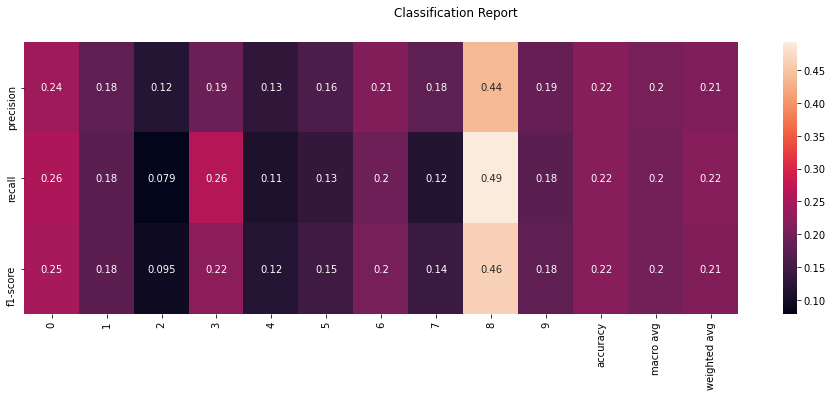

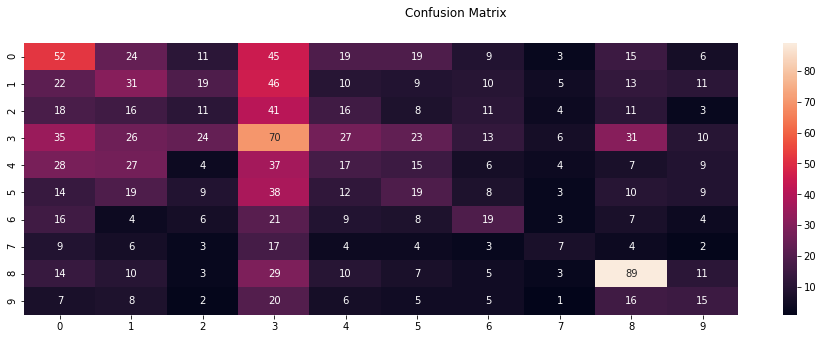

In [26]:
X = dataset.iloc[:, dataset.columns != 'Dauer Kategorie'].values
y = dataset.iloc[:, dataset.columns == 'Dauer Kategorie'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#print("Train")
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_train_predicted = clf.predict(X_train)
#print(confusion_matrix(y_train,y_train_predicted))
#print(classification_report(y_train,y_train_predicted))
#print(accuracy_score(y_train, y_train_predicted))

print("Test")
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=range(len(bins_labels)-1),
                                   target_names=range(len(bins_labels)-1),
                                   output_dict=True)
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(5)
fig.suptitle("Classification Report")
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :], annot=True)
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(5)
fig.suptitle("Confusion Matrix")
sns.heatmap(cm, annot=True)
"""h = ax.matshow(cm)
fig.colorbar(h)
ax.set_xticklabels([''] + bins_labels)
ax.set_yticklabels([''] + bins_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')"""

In [ ]:
offset = 50
show = 50
plt.figure(figsize=(14,8))
plt.plot(y_pred[offset:offset+show], 'r', label='Predicted', linewidth=0.4)
plt.plot(y_test[offset:offset+show], 'g', label='Actual Data', linewidth=0.4)
plt.legend()
plt.show()